In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Dilation

In [11]:
def show(title='image', image=None):
    plt.title(title)
    plt.imshow(image,'gray')
    plt.axis('off')
    plt.show()

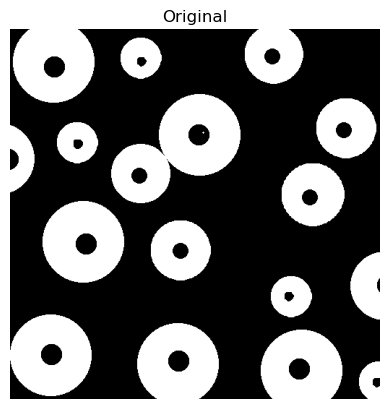

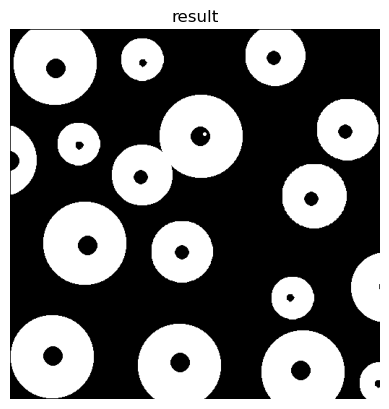

In [14]:
img = cv2.imread('./holes.tif',0)
thresholded = np.zeros((img.shape[0], img.shape[1]))

#binarizing image

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >127:
            thresholded[i,j] = 255


dilate = np.zeros((img.shape[0], img.shape[1]))
mask = np.ones((7,7), dtype=np.int8)
k = mask.shape[0]//2
img2 = np.pad(thresholded, (k,k), 'constant')/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i:i+k, j:j+k].any() == mask.any():
            dilate[i,j] = 1
            
show('Original', img)
show('result', dilate)

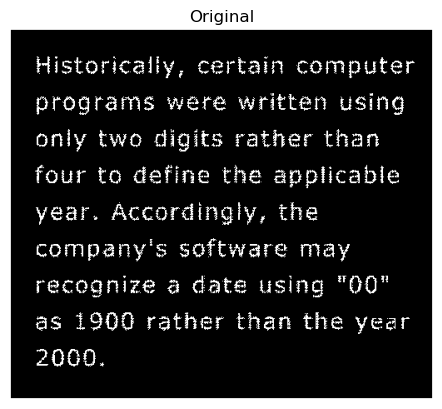

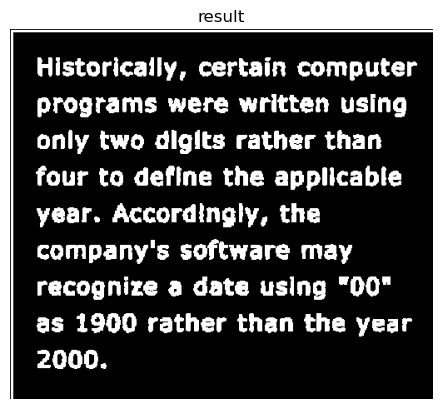

In [19]:
img = cv2.imread('./text.tif',0)
thresholded = np.where(img>127, 255, 0)
result = np.zeros((img.shape[0], img.shape[1]))
mask = np.ones((7,7), dtype=np.int8)
k = mask.shape[0]//2
img2 = np.pad(thresholded, (k,k), 'constant')/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i:i+k, j:j+k].any() == mask.any():
            result[i,j] = 1
            
show('Original', img)
show('result', result)

### Erosion

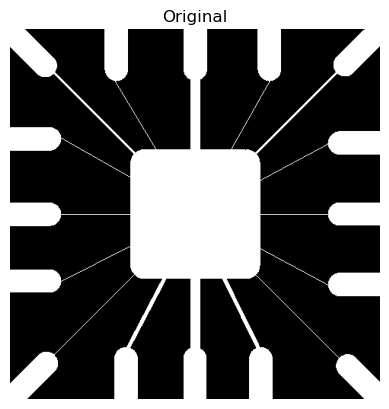

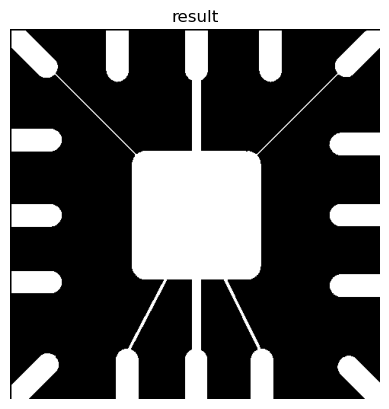

In [25]:
img = cv2.imread('./wire.tif',0)
thresholded = np.where(img>127, 255, 0)
result = np.zeros((img.shape[0], img.shape[1]))
mask = np.ones((5,5), dtype=np.int8)
k = mask.shape[0]//2
img2 = np.pad(thresholded, (k,k), 'constant')/255
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i:i+k, j:j+k].all() == mask.all():
            result[i,j] = 1
            
show('Original', img)
show('result', result)

### Opening
    erosion followed by dilation

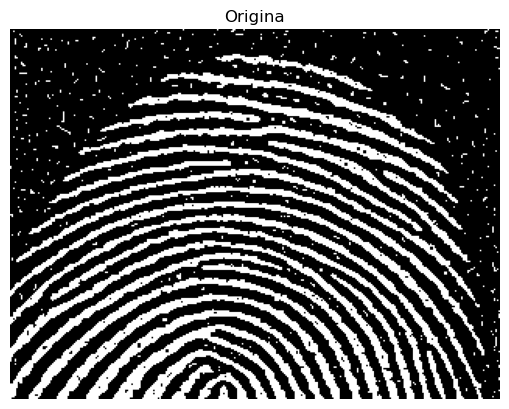

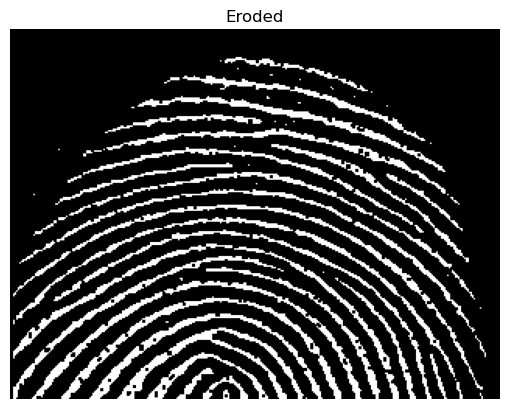

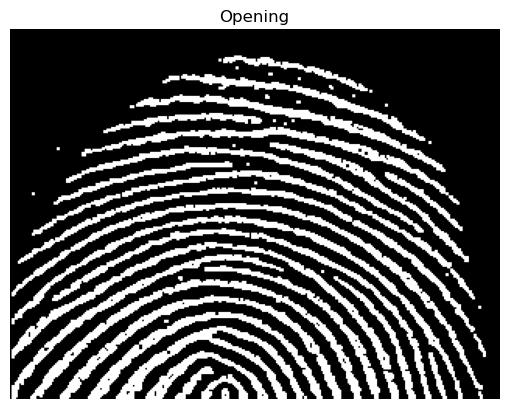

In [26]:
img = cv2.imread('./fingerprint.tif', 0)
mask = np.ones((5,5), dtype=np.int8)
k = mask.shape[0]//2
show('Origina', img)
result = np.zeros((img.shape[0], img.shape[1]), dtype=np.int8)
thresholded = np.where(img>127, 255, 0)/255
img2 = np.pad(thresholded, (k,k), 'constant')


#Erosion
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i:i+k, j:j+k].all() == mask.all():
            result[i,j] = 1
            
show('Eroded', result)

#dilation
for i in range(img.shape[1]):
    for j in range(img.shape[1]):
        if result[i:i+k, j:j+k].any() == mask.any():
            result[i,j] = 1
show('Opening',result )


### Closing
    Dilation followed by erosion

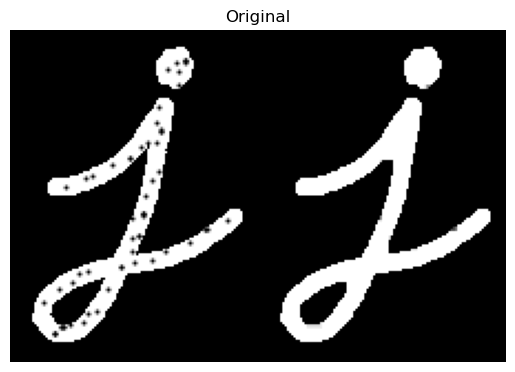

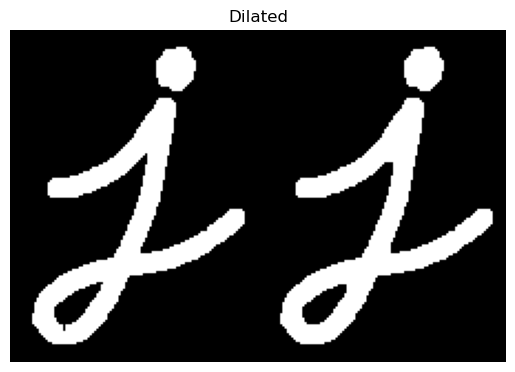

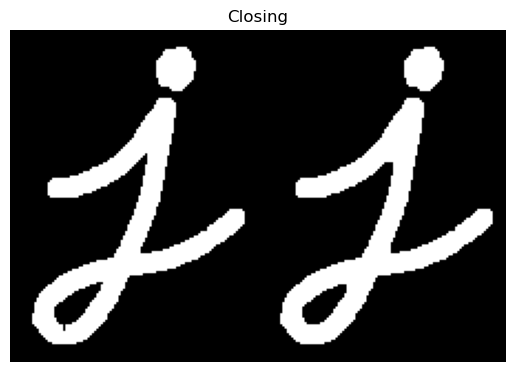

In [54]:
img = cv2.imread('./closing.png', 0)
assert img is not None, 'File does not exist'
thresholded = np.where(img>100, 255, 0)
img2 = np.pad(thresholded, (1,1), 'constant')/255
mask = np.ones((5,5), dtype=np.int8)
# mask_e = np.ones((25,25), dtype=np.int8)
result = np.zeros((img.shape[0], img.shape[1]), dtype=np.int8)
k = mask.shape[0]//2
show('Original', img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img2[i:i+k, j:j+k].any() == mask.any():
            result[i,j] = 1
show('Dilated', result)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i:i+k, j:j+k].all() == mask.all():
            result[i,j] = 1
show('Closing', result)

### Corner counting

### Intensity Slicing

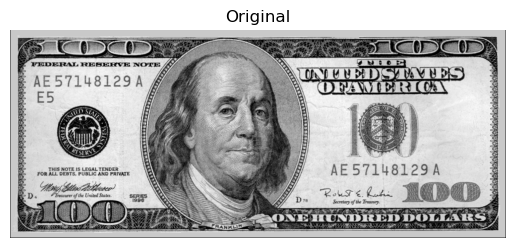

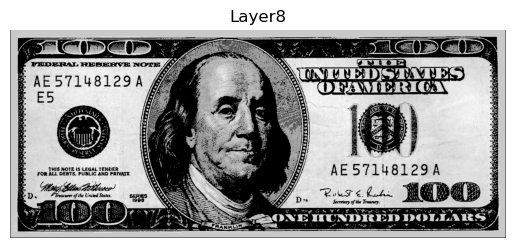

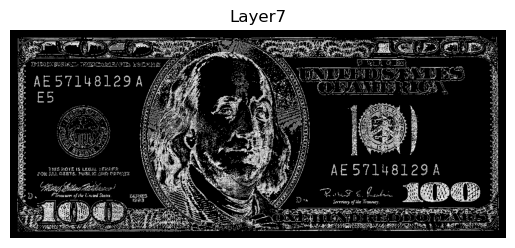

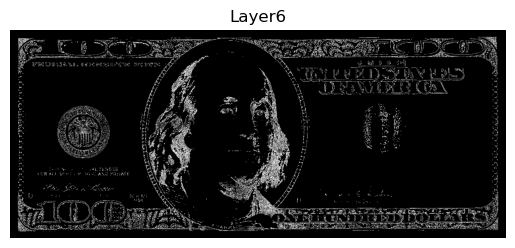

In [12]:
img = cv2.imread('./dollar.tif',0)

l1 = np.zeros((img.shape[0], img.shape[1]))
l2 = np.zeros((img.shape[0], img.shape[1]))
l3 = np.zeros((img.shape[0], img.shape[1]))
l4 = np.zeros((img.shape[0], img.shape[1]))
l5 = np.zeros((img.shape[0], img.shape[1]))
l6 = np.zeros((img.shape[0], img.shape[1]))
l7 = np.zeros((img.shape[0], img.shape[1]))
l8 = np.zeros((img.shape[0], img.shape[1]))

show('Original', img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #for 8-bit information
        if img[i,j]>127 and img[i,j]<=255:
            l8[i,j] = img[i,j]
        #for 7-bit information
        elif img[i,j]>63 and img[i,j]<=127:
            l7[i,j] = img[i,j]
        #for 6-bit information
        else:
            l6[i,j] = img[i,j]
show('Layer8', l8)
show('Layer7', l7)
show('Layer6', l6)
        

### Reconstruct image from 6-8 layers

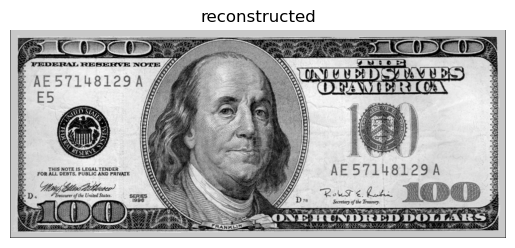

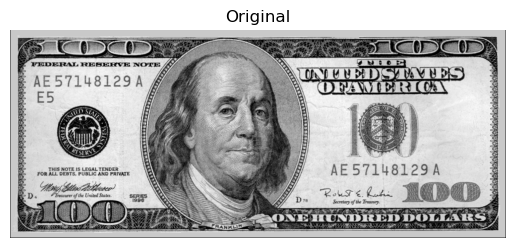

In [14]:
recon_img = l8+l7+l6
show('reconstructed', recon_img)
show('Original', img)

In [10]:
img = np.array([[0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0],
                [1, 1, 1, 1, 1, 1, 0, 0],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [0, 0, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 0, 0, 0]])
result = np.zeros((img.shape[0], img.shape[1]))
mask = np.ones((3,3), dtype=np.int8)
m = mask.shape[0]//2
img = np.pad(img, (m), 'constant')
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        if img[i,j]==mask[0,0] and img[i,j+1]==mask[0,1] and img[i,j]==mask[0,2] and img[i+1,j]==mask[1,0] and img[i+1,j+1]==mask[1,1] and img[i+1,j+2]==mask[1,2] and img[i+1,j]==mask[2,0] and img[i+2,j+1]==mask[2,1] and img[i+2,j+2]==mask[2,2]:
            result[i,j] = 1
            
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
img.shape

(9, 10)

In [9]:
img = np.ones((7,7))
img2 = np.pad(img,(1,1), 'constant')
print(img.shape, img2.shape)

(7, 7) (9, 9)


In [17]:
img = cv2.imread('./holes.tif',0)
thresholded = np.zeros((img.shape[0], img.shape[1]))

#binarizing image

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] > 127:
            thresholded[i,j] = 255


dilate = np.zeros((img.shape[0], img.shape[1]))
mask = np.ones((3,3), dtype=np.uint8)
m = mask.shape[0]//2
p_img = np.pad(thresholded, (m, m), 'constant')/255

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        region = p_img[i:i+3,j:j+3]
        if region.any() == mask.any():
            dilate[i,j] = 1

        

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


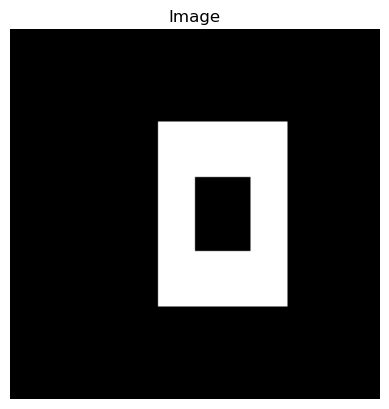

238

In [15]:
img = np.zeros((200,200))
img[50:150, 80:150] = 255
img[80:120, 100:130] = 0
plt.title('Image'); plt.axis('off')
plt.imshow(img, 'gray')
plt.show()

e1 = np.array([[0,0],
              [0,255]])
ex_c = 0
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        if img[i,j] == e1[0,0] and img[i+1,j+1] == e1[1,1] and img[i,j+1] ==e1[0,1] and img[i+1,j]==e1[1,0]:
            ex_c = ex_c + 1
        elif img[i,j] == e1[0,0] and img[i+1,j+1] == e1[1,1]:
            ex_c += 1
            
ex_c

In [6]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
lbl, stats, h, w = cv2.connectedComponentsWithStats()